In [1]:
from paprika import paprika
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

DEBUG = False

In [2]:
def checkBuyCondition(price, movingAverage, buyBelowMA, RSI):
  print("Price: " + str(price) + " < MA: " + str(movingAverage) + " buyBelowMA: " + str(movingAverage - (movingAverage * buyBelowMA)) + " and RSI < 39.5", RSI)
  if price < movingAverage - (movingAverage * buyBelowMA) and (RSI <= 39.5):
    return True

  return False

In [3]:
def getEURUSD():
  apiurl = "https://www.freeforexapi.com/api/live?pairs=EURUSD"
  try:
    request = requests.get(
        url=apiurl
    )
    parsed = json.loads(request.content)
    if(DEBUG):
        print (json.dumps(parsed, indent=2))

  except requests.exceptions.RequestException as e:
    print(e)

  if not DEBUG:
    return parsed['rates']['EURUSD']['rate']

In [4]:
def main():
  rate = getEURUSD()
  btc=paprika("BTC")
  btc.initDF()
  btc.addMovingAverages()
  btc.addMomentumIndicators()
  #print(btc.df)
  last = btc.df.tail(1)
  #print(last)
  ts = last['time_close'].values[0]
  close = float(last['close'].values[0])/rate
  sma50 = float(last['sma50'].values[0])/rate
  sma200 = float(last['sma200'].values[0])/rate
  rsi14 = float(last['rsi14'].values[0])
  ts,buy,sell = btc.getPrice()

  #print(ts, close, sma50, sma200, rsi14)
  #print("\nEURUSD: ",rate)
  #print("Current price:", ts,buy,sell)
  
  if checkBuyCondition(float(sell), sma200, float(btc.buyBelowMA), rsi14):
    print("Osta osta osta")
  else:
    print("No go")

  plt.rcParams["figure.figsize"] = (40,3)

  btc.df['buysignal'] = btc.df['sma50'] - (btc.df['sma50'] * float(btc.buyBelowMA))
  fig, (ax1) = plt.subplots(1)
  btc.df.plot(x ='time_close', y='rsi14', kind = 'line', ax=ax1)
  ax1.set_ylim(0,100)
  ax1.axhline(39.5, color='r', linestyle='--')
  ax1.axhline(70, color='r', linestyle='--')
  ax1.set_ylabel('RSI')
  plt.rcParams["figure.figsize"] = (40,10)
  plt.show()

  fig, ax = plt.subplots(figsize=(40,10))
  btc.df.plot(x ='time_close', y='close', kind = 'line', ax=ax, label='close')
  btc.df.plot(x ='time_close', y='sma50', kind = 'line', ax=ax, label='sma50')
  btc.df.plot(x ='time_close', y='sma200', kind = 'line', ax=ax, label='sma200')

  btc.df.plot(x ='time_close', y='buysignal', kind = 'line', ax=ax, label='buysignal')

  plt.show()
  




Loading Config...
Price: 28827.55 < MA: 28711.492907170166 buyBelowMA: 28496.15671036639 and RSI < 39.5 58.46986535244247
No go


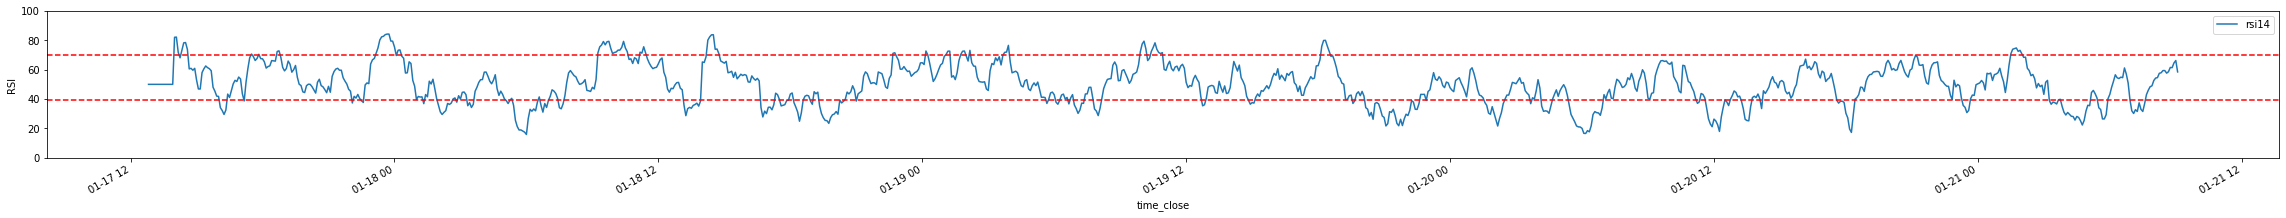

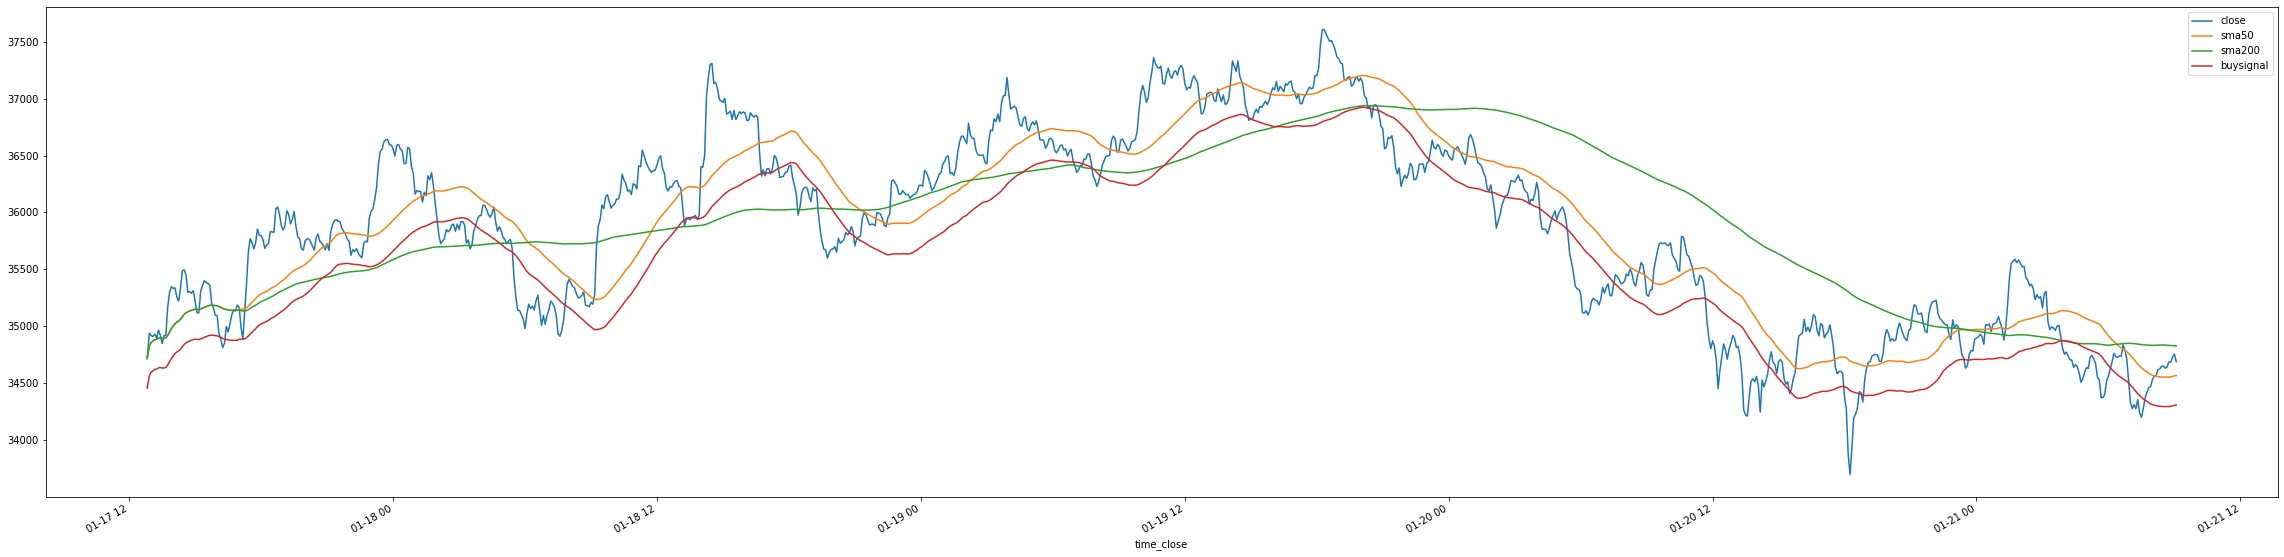

In [18]:
if __name__ == "__main__":
  main()